<a href="https://colab.research.google.com/github/newmantic/RNN/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [4]:
class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights
        self.hidden_size = hidden_size
        self.Wxh = np.random.randn(hidden_size, input_size) * 0.01  # input to hidden
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.01  # hidden to hidden
        self.Why = np.random.randn(output_size, hidden_size) * 0.01  # hidden to output
        self.bh = np.zeros((hidden_size, 1))  # hidden bias
        self.by = np.zeros((output_size, 1))  # output bias

    def forward(self, inputs):
        h = np.zeros((self.hidden_size, 1))  # initial hidden state
        hs = []  # store hidden states for each time step
        ys = []  # store outputs for each time step

        for x in inputs:
            x = np.reshape(x, (-1, 1))
            h = np.tanh(np.dot(self.Wxh, x) + np.dot(self.Whh, h) + self.bh)
            y = np.dot(self.Why, h) + self.by
            hs.append(h)
            ys.append(y)

        return ys, hs

    def backward(self, inputs, hs, ys, targets, learning_rate=0.001):
        dWxh, dWhh, dWhy = np.zeros_like(self.Wxh), np.zeros_like(self.Whh), np.zeros_like(self.Why)
        dbh, dby = np.zeros_like(self.bh), np.zeros_like(self.by)
        dhnext = np.zeros_like(hs[0])

        for t in reversed(range(len(inputs))):
            dy = ys[t] - targets[t]
            dWhy += np.dot(dy, hs[t].T)
            dby += dy
            dh = np.dot(self.Why.T, dy) + dhnext
            dhraw = (1 - hs[t] * hs[t]) * dh  # backprop through tanh nonlinearity
            dbh += dhraw
            dWxh += np.dot(dhraw, np.reshape(inputs[t], (-1, 1)).T)
            if t > 0:
                dWhh += np.dot(dhraw, hs[t-1].T)
            dhnext = np.dot(self.Whh.T, dhraw)

        for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
            np.clip(dparam, -5, 5, out=dparam)  # clip to mitigate exploding gradients

        # Update weights and biases
        self.Wxh -= learning_rate * dWxh
        self.Whh -= learning_rate * dWhh
        self.Why -= learning_rate * dWhy
        self.bh -= learning_rate * dbh
        self.by -= learning_rate * dby

    def train(self, inputs, targets, epochs=100, learning_rate=0.001):
        for epoch in range(epochs):
            ys, hs = self.forward(inputs)
            self.backward(inputs, hs, ys, targets, learning_rate=learning_rate)
            if epoch % 10 == 0:
                loss = np.sum((np.array(ys) - np.array(targets))**2)
                print(f'Epoch {epoch}, Loss: {loss:.4f}')

Epoch 0, Loss: 435.9685
Epoch 10, Loss: 435.9108
Epoch 20, Loss: 435.9844
Epoch 30, Loss: 437.0944
Epoch 40, Loss: 448.3704
Epoch 50, Loss: 496.4162
Epoch 60, Loss: 570.0010
Epoch 70, Loss: 630.2302
Epoch 80, Loss: 671.7169
Epoch 90, Loss: 723.8065


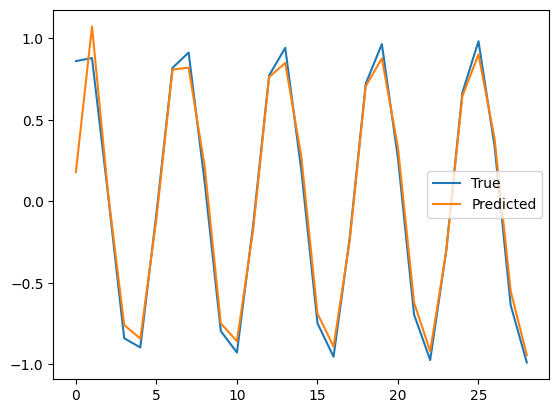

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple sine wave sequence
def generate_data(seq_length=20):
    x = np.linspace(0, seq_length, seq_length)
    y = np.sin(x)
    return y[:-1], y[1:]  # input sequence and target sequence

# Initialize the RNN
input_size = 1
hidden_size = 10
output_size = 1

rnn = SimpleRNN(input_size, hidden_size, output_size)

# Generate training data
inputs, targets = generate_data(seq_length=30)
inputs = [np.array([i]) for i in inputs]
targets = [np.array([t]) for t in targets]

# Train the RNN
rnn.train(inputs, targets, epochs=100, learning_rate=0.01)

# Generate predictions
preds, _ = rnn.forward(inputs)

# Plot the results
plt.plot(range(len(targets)), [t[0] for t in targets], label='True')
plt.plot(range(len(preds)), [p[0][0] for p in preds], label='Predicted')
plt.legend()
plt.show()